# Applying Logistic Regression on Wine and Fire Data

## change me pls

As a consumer, we want to find high quality wines from California. We would like to see if there are specific factors that impact the ratings of these wines. By running linear regression on our dataset, we can find out if there is a correlation between features of the wine and its rating. 

Within our dataset, we can only run linear regression on the vintage and price of the wines, so we plan to enrich our data with potential latent variables. Since one of California's major natural disasters are wildfires, we plan to see if these fires effect the ratings of the wines. To join these datasets, we will join by the county and the year the fire happened and the vintage of the wine. 


In [34]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
# Load the cleaned data into dataframe

""" 
    Information of cleaned dataset:
    
    - Province and Variety of wine is transfomed from a categorical attribute to numerical attribute
    - Vintage of wine is extracted from the title of each wine
    - Rows were removed if there were null values present within each of the three attributes (Province, Variety, Vintage)
    
"""
warnings.simplefilter('ignore')
data = pd.read_csv("../data/final_wine_and_fire_data.csv")
data.dropna(inplace = True)
print(data.shape)
data.head()

(9757, 26)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,country,description,designation,points,price,province,...,winery,province_id,variety_numerical,vintage,lat,lon,total_fires,sum_fire_size,total_fires_current,sum_fire_size_current
0,0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,...,Kirkland Signature,7,80,2011,38.297137,-122.285529,0,0.00,202,1756.38
1,3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,...,Bianchi,7,326,2011,37.050096,-121.990591,4,79.10,192,639.14
2,4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,...,Castello di Amorosa,7,440,2011,38.293313,-122.469386,0,0.00,202,1756.38
3,12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,...,Okapi,7,80,2013,38.297137,-122.285529,122,1339.78,247,1453.08
4,13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,...,Sevtap,7,514,2015,35.282753,-120.659616,82,719.08,109,2711.55


In [18]:
# Normalizing province id between 1 and 0 
data['norm_vintage'] = abs((data.vintage - data.vintage.min()) / (data.vintage.max()))

# Normalizing variety (numerical) between 1 and 0 
data['norm_variety_numerical'] = abs((data.variety_numerical - data.variety_numerical.min()) / (data.variety_numerical.max()))

# Normalizing price between 1 and 0 
data['norm_price'] = abs((data.price - data.price.min()) / (data.price.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_points'] = abs((data.points - data.points.min()) / (data.points.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_total_fires'] = abs((data.total_fires - data.total_fires.min()) / (data.total_fires.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_sum_fire_size'] = abs((data.sum_fire_size - data.sum_fire_size.min()) / (data.sum_fire_size.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_total_fires_current'] = abs((data.total_fires_current - data.total_fires_current.min()) / (data.total_fires_current.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_sum_fire_size_current'] = abs((data.sum_fire_size_current - data.sum_fire_size_current.min()) / (data.sum_fire_size_current.max()))

Here, we apply logistic regression with multiclass to try to predict the price and the points of a wine. The results are not very good, since there are so many y 'classes' to predict. 

0.05134775033309419


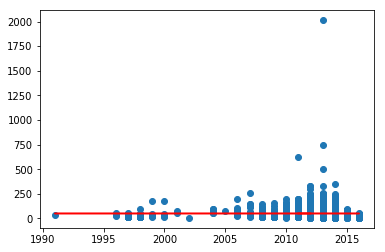

In [4]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['price']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  

plt.plot(x,predict,color = 'red')
plt.show()

0.16347237880496054


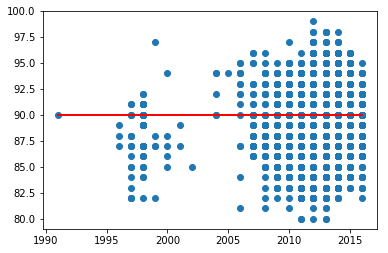

confusion matrix
[[   0    0    0    0    0    0    0    0    0    0    5    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    6    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   38    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   71    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  155    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  289    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  541    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  754    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1204    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  

In [40]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  

plt.plot(x,predict,color = 'red')
plt.show()

model_stats(y, predict)

0.16357486932458748


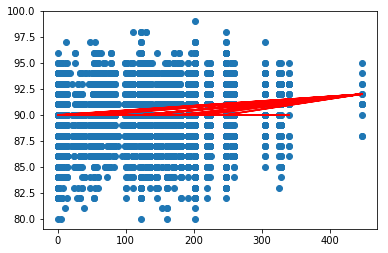

In [6]:
x = data.loc[:, ['total_fires']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.12411601926821769


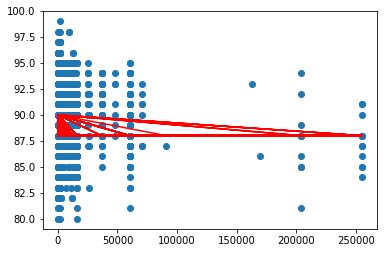

In [7]:
x = data.loc[:, ['sum_fire_size']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.16459977452085683


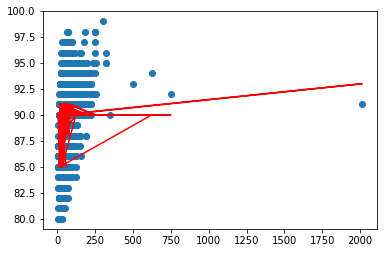

In [8]:
x = data.loc[:, ['vintage', 'price','total_fires','sum_fire_size', 'variety_numerical']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x.iloc[:,1], y)  

plt.plot(x.iloc[:,1],predict,color = 'red')
plt.show()

Here, we convert the points into a binary value, 1 being good wines with a rating over 90, and 0 being bad wines with a score less than 90. We can then run logistic regression on the data with a binary output.

In [9]:
data['good_wine'] = 0
good_count= 0
for index, row in data.iterrows():
    if(row['points'] > 90):
        data.loc[index,'good_wine'] = 1
        good_count += 1
print(str(good_count) + ', ' + str(1-(good_count/data.shape[0])))
data.head()

4430, 0.5459669980526801


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,country,description,designation,points,price,province,...,sum_fire_size,total_fires_current,sum_fire_size_current,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,good_wine
0,0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,...,0.00,202,1756.38,0.009921,0.113960,0.006955,0.070707,0.000000,0.000000,0
1,3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,...,79.10,192,639.14,0.009921,0.464387,0.008445,0.070707,0.008929,0.000310,0
2,4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,...,0.00,202,1756.38,0.009921,0.626781,0.031793,0.070707,0.000000,0.000000,0
3,12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,...,1339.78,247,1453.08,0.010913,0.113960,0.047193,0.060606,0.272321,0.005246,0
4,13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,...,719.08,109,2711.55,0.011905,0.732194,0.010432,0.060606,0.183036,0.002815,0


Here we can see that the price and the combination of all our features do have an effect on our regression, increasing the accuracy beyond randomly guessing. 

0.5459669980526801


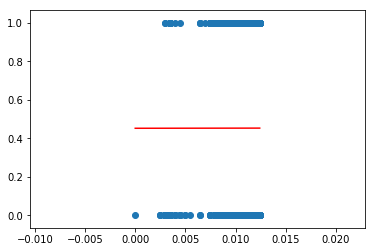

In [10]:
x = data.loc[:, ['norm_vintage']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_vintage')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.5878856205800963


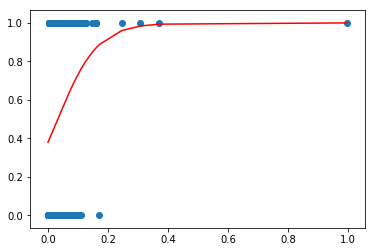

In [11]:
x = data.loc[:, ['norm_price']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='sag', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_price')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.5577534078097776


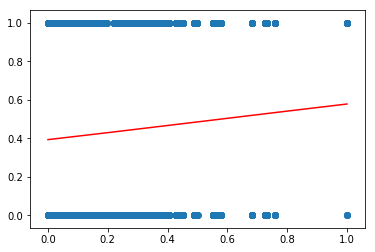

In [12]:
x = data.loc[:, ['norm_total_fires']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)


plt.scatter(x, y)  
x = x.sort_values(by = 'norm_total_fires')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.5459669980526801


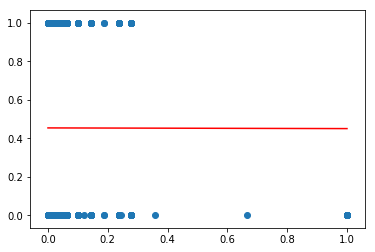

In [20]:
x = data.loc[:, ['norm_sum_fire_size_current']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_sum_fire_size_current')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.6156605513989956


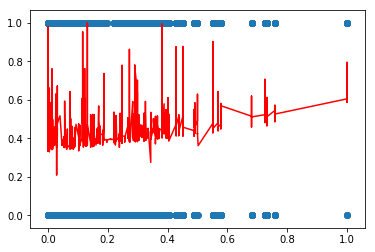

In [14]:
x = data.loc[:, ['norm_vintage', 'norm_price','norm_total_fires','norm_sum_fire_size', 'norm_variety_numerical']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x.iloc[:,2], y) 
x = x.sort_values(by = 'norm_total_fires')
plt.plot(x.iloc[:,2],reg.predict_proba(x)[:,1],color = 'red')
plt.show()


In [15]:
data['expensive_wine'] = 0
expensive= 0
for index, row in data.iterrows():
    if(row['price'] > 50):
        data.loc[index,'expensive_wine'] = 1
        expensive += 1
print(str(expensive) + ', ' + str(1 - (expensive/data.shape[0])))
data.head()

2898, 0.7029824741211438


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,country,description,designation,points,price,province,...,total_fires_current,sum_fire_size_current,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,good_wine,expensive_wine
0,0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,...,202,1756.38,0.009921,0.113960,0.006955,0.070707,0.000000,0.000000,0,0
1,3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,...,192,639.14,0.009921,0.464387,0.008445,0.070707,0.008929,0.000310,0,0
2,4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,...,202,1756.38,0.009921,0.626781,0.031793,0.070707,0.000000,0.000000,0,1
3,12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,...,247,1453.08,0.010913,0.113960,0.047193,0.060606,0.272321,0.005246,0,1
4,13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,...,109,2711.55,0.011905,0.732194,0.010432,0.060606,0.183036,0.002815,0,0


0.7029824741211438


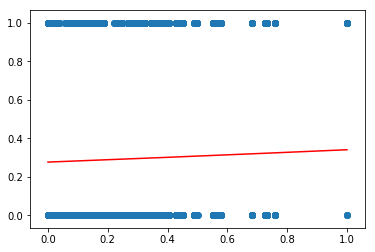

Confusion matrix, without normalization
[[6859    0]
 [2898    0]]


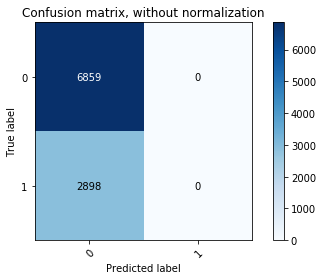


precision
0.4941843589214846
recall
0.7029824741211438
f1 score
0.5803751552716568


In [37]:
x = data.loc[:, ['norm_total_fires']]
y = data.loc[:, ['expensive_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_total_fires')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')

plt.show()

model_stats(y, predict)

In [29]:
#from  https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
#used to plot the confusion matrix nicely

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax


In [39]:
def model_stats(y_true, y_pred):
    try:
        plot_confusion_matrix(y_true, y_pred, unique_labels(y_true))
    except:
        conf_mat = confusion_matrix(y_true, y_pred)
        print('confusion matrix')
        print(conf_mat)
    
    stats = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
    print('\nprecision')
    print(stats[0])
    print('recall')
    print(stats[1])
    print('f1 score')
    print(stats[2])

# add some analysis here

From these logistical regressions, we can see that they don't do a really good job at predicting our output of the points of the wine. 